In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040370.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5       6  \
0  1.746823  1.719453  1.695015  1.667644  1.639296  1.610948  1.5826   

         7         8         9  ...      4192     4193    4194      4195  \
0  1.55523  1.528837  1.502444  ...  3.135875  3.14956  3.1652  3.177908   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  3.184751  3.183773  3.173998  3.154448     139.34982      56.401298  

[1 rows x 4202 columns]
[139.34981962]  /  [56.40129789]
          0         1         2         3         4         5       6  \
0  1.746823  1.719453  1.695015  1.667644  1.639296  1.610948  1.5826   

         7         8         9  ...      4190      4191      4192     4193  \
0  1.55523  1.528837  1.502444  ...  3.074291  3.112414  3.135875  3.14956   

     4194      4195      4196      4197      4198      4199  
0  3.1652  3.177908  3.184751  3.183773  3.173998  3.154448  

[1 rows x 4200 columns]


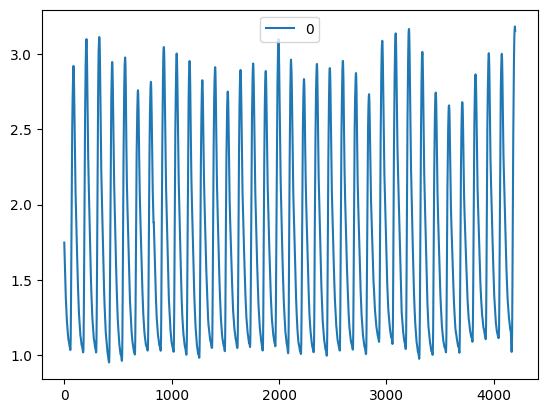

In [336]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [337]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

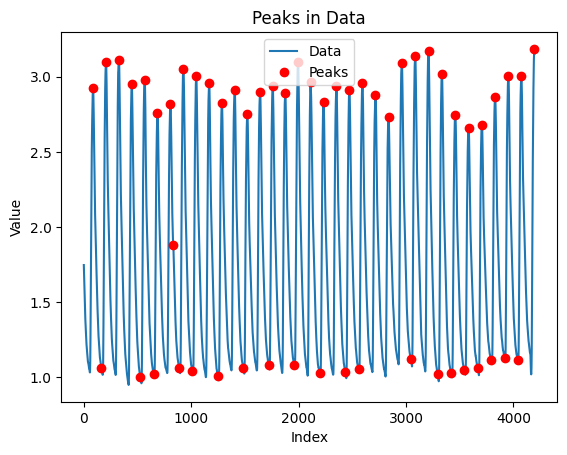

{'indices': array([  86,  164,  207,  326,  446,  526,  567,  651,  686,  807,  833,
        888,  927, 1012, 1047, 1167, 1249, 1285, 1405, 1486, 1522, 1641,
       1723, 1759, 1876, 1960, 1995, 2111, 2197, 2232, 2353, 2434, 2473,
       2559, 2594, 2716, 2838, 2961, 3046, 3086, 3210, 3295, 3335, 3420,
       3459, 3544, 3583, 3669, 3706, 3794, 3829, 3919, 3953, 4043, 4074,
       4196]), 'values': array([2.92179863, 1.06158358, 3.10068426, 3.1143695 , 2.94819159,
       1.00391007, 2.97849462, 1.02150538, 2.76050831, 2.81622678,
       1.88172043, 1.06158358, 3.04789834, 1.04398827, 3.00488759,
       2.95503421, 1.00684262, 2.82697947, 2.91397849, 1.06158358,
       2.75171065, 2.89540567, 1.07917889, 2.93841642, 2.88856305,
       1.0801564 , 3.10068426, 2.96383187, 1.02541544, 2.83479961,
       2.93548387, 1.0342131 , 2.90811339, 1.05474096, 2.95601173,
       2.87487781, 2.73411535, 3.08993157, 1.11925709, 3.13880743,
       3.16813294, 1.02052786, 3.01564027, 1.02737048, 2.74486

In [338]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [340]:
def split_values_high_low(filtered_df, threshold=2):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[2.921798631476051, None, 3.1006842619745845, 3.114369501466276, 2.948191593352884, None, 2.978494623655914, None, 2.760508308895406, 2.81622678396872, None, None, 3.047898338220919, None, 3.004887585532747, 2.9550342130987293, None, 2.8269794721407626, 2.913978494623656, None, 2.7517106549364616, 2.895405669599218, None, 2.93841642228739, 2.8885630498533725, None, 3.1006842619745845, 2.963831867057673, None, 2.834799608993157, 2.935483870967742, None, 2.90811339198436, None, 2.956011730205278, 2.874877810361681, 2.7341153470185726, 3.089931573802541, None, 3.1388074291300097, 3.1681329423264906, None, 3.01564027370479, None, 2.744868035190616, None, 2.659824046920821, None, 2.681329423264907, None, 2.866080156402737, None, 3.006842619745845, None, 3.002932551319648, 3.1847507331378297]
[None, 1.06158357771261, None, None, None, 1.0039100684261977, None, 1.021505376344086, None, None, 1.881720430107527, 1.06158357771261, None, 1.0439882697947214, None, None, 1.0068426197458455, None, N

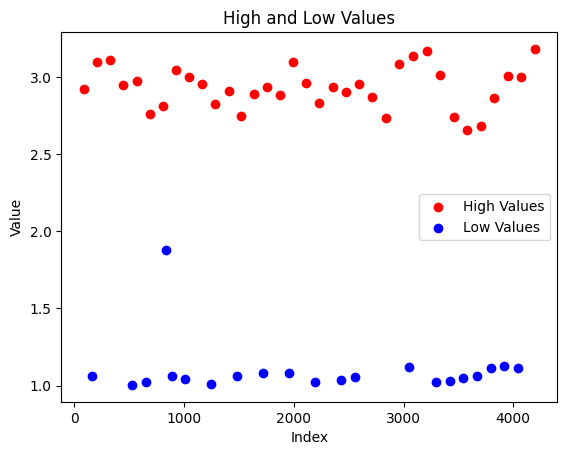

In [341]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [342]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 2.935148722245496
Average Low Value: 1.0977051622212914


In [343]:
# Scale down to 0-1
def scale_down(a, min_val_orig=0, max_val_orig=4, min_val_scale=0, max_val_scale=1):

    scaled_value = min_val_scale + (a - min_val_orig) * (max_val_scale - min_val_scale) / (max_val_orig - min_val_orig)
    return scaled_value

In [344]:
scaled_average_high = scale_down(average_high)
scaled_average_low = scale_down(average_low)
print("Scaled value of", average_high, ":", scaled_average_high)
print("Scaled value of", average_low, ":", scaled_average_low)

Scaled value of 2.935148722245496 : 0.733787180561374
Scaled value of 1.0977051622212914 : 0.27442629055532286
